In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import openpyxl
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, KNNImputer

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [5]:
# Importing models


In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.079
OverallQual,0.214395
OverallCond,0.096479
YearBuilt,0.160799
YearRemodAdd,0.025352
BsmtFinSF1,0.091466
BsmtUnfSF,-0.03308
TotalBsmtSF,0.138199


###### Ridge Regression

In [8]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [9]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091346
0.11710797319752998
0.11723952924901117
0.11741457158889525
0.11762384068711455
0.11825709631198021
0.11900057469147929
0.1225464999629295
0.13073599680747125


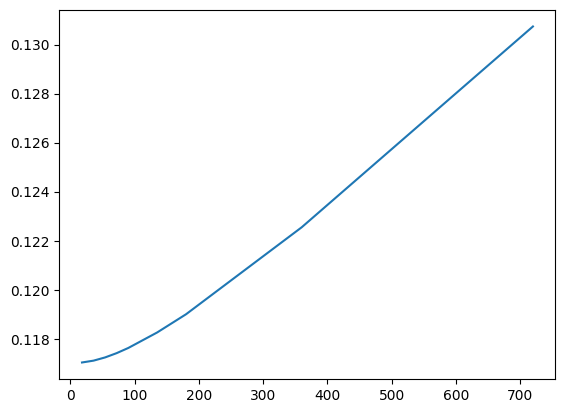

In [10]:
plt.plot(alphas, mses)

###### Lasso

In [11]:
# Import Lasso
from sklearn.linear_model import Lasso

In [12]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [13]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [14]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608793
0.11682687945311097
0.11803348353132033
0.12012836764958999
0.12301536903084047
0.13178576395045638
0.1401719458448378


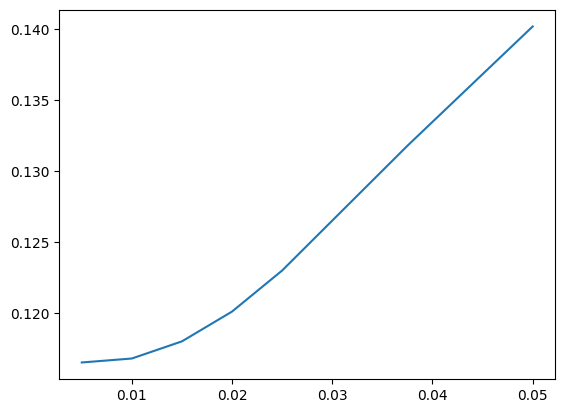

In [15]:
plt.plot(alphas, mses)

### Part A - Dealing with Missing Observations

#### **Mean** as a method of removing missing data

In [16]:
original_data = pd.read_excel('Original_Data.xlsx', engine='openpyxl', header=3) 
original_data = original_data.iloc[:,:-2]
print(original_data.head())

print(original_data['LotFrontage'].describe())
print(original_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [17]:
original_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train_data = original_data.iloc[:1800].copy(deep=True)
validation_data = original_data.iloc[1800:2400].copy(deep=True)
test_data = original_data.iloc[2400:].copy(deep=True)

features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'LotArea', 'SalePrice']
target = 'SalePrice'

train = train_data.copy(deep=True) 
val = val.copy(deep=True)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# # Creating the "X" and "y" variables. We drop sale price from "X"
# X_train, X_val = train.drop('SalePrice'), val.drop('SalePrice', axis=1)
# y_train, y_val = train[['SalePrice']], val[['SalePrice']]     

In [20]:
# mses_mean_imputation = {}
# mses_median_imputation = {}
# mses_knn_imputation = {}

# # Mean Imputer
# mean_imputer = SimpleImputer(strategy='mean')
# # Deep copy before transformation
# X_train_mean_dc = X_train.copy(deep=True)
# X_val_mean_dc = X_val.copy(deep=True)
# X_train_mean = mean_imputer.fit_transform(X_train_mean_dc)
# X_val_mean = mean_imputer.transform(X_val_mean_dc)

# # Median Imputer
# median_imputer = SimpleImputer(strategy='median')
# # Deep copy before transformation
# X_train_median_dc = X_train.copy(deep=True)
# X_val_median_dc = X_val.copy(deep=True)
# X_train_median = median_imputer.fit_transform(X_train_median_dc)
# X_val_median = median_imputer.transform(X_val_median_dc)

# # KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)
# # Deep copy before transformation
# X_train_knn_dc = X_train.copy(deep=True)
# X_val_knn_dc = X_val.copy(deep=True)
# X_train_knn = knn_imputer.fit_transform(X_train_knn_dc)
# X_val_knn = knn_imputer.transform(X_val_knn_dc)

# # Repeat deep copying for any additional transformations as necessary, using the same pattern:
# # For example, if applying transformations again for a specific analysis:
# ls_X_train_mean_dc = X_train.copy(deep=True)
# ls_X_val_mean_dc = X_val.copy(deep=True)
# ls_X_train_mean = mean_imputer.fit_transform(ls_X_train_mean_dc)
# ls_X_val_mean = mean_imputer.transform(ls_X_val_mean_dc)

# ls_X_train_median_dc = X_train.copy(deep=True)
# ls_X_val_median_dc = X_val.copy(deep=True)
# ls_X_train_median = median_imputer.fit_transform(ls_X_train_median_dc)
# ls_X_val_median = median_imputer.transform(ls_X_val_median_dc)

# ls_X_train_knn_dc = X_train.copy(deep=True)
# ls_X_val_knn_dc = X_val.copy(deep=True)
# ls_X_train_knn = knn_imputer.fit_transform(ls_X_train_knn_dc)
# ls_X_val_knn = knn_imputer.transform(ls_X_val_knn_dc)

In [21]:
# A =[X_train == X_train_median]
# not np.all(A)

In [22]:


train_data = original_data.iloc[:1800].copy(deep=True)
validation_data = original_data.iloc[1800:2400].copy(deep=True)
test_data = original_data.iloc[2400:].copy(deep=True)

features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'LotArea']
target = 'SalePrice'

mean_imputer = SimpleImputer(strategy='mean')
train_data['LotFrontage'] = mean_imputer.fit_transform(train_data[['LotFrontage']])
validation_data['LotFrontage'] = mean_imputer.transform(validation_data[['LotFrontage']])
test_data['LotFrontage'] = mean_imputer.transform(test_data[['LotFrontage']])

In [23]:
train = train_data.copy(deep=True) 
val = val.copy(deep=True)

train = train[features]
val = val[features]

train.head()

KeyError: "['LotFrontage'] not in index"

In [ ]:
lr = LinearRegression()
lr.fit(train_data[features], train_data[target])
lr.coef_

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_alpha(train_data, features, target):
    # Define the parameter grid
    param_grid = {'alpha': [0.001, 0.015, 0.1, 1, 10, 100]}
    
    # Define the models
    lasso = Lasso()
    ridge = Ridge()

    # Setup grid searches
    grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search for Lasso
    grid_search_lasso.fit(train_data[features], train_data[target])
    lasso_best_alpha = grid_search_lasso.best_params_['alpha']

    # Perform grid search for Ridge
    grid_search_ridge.fit(train_data[features], train_data[target])
    ridge_best_alpha = grid_search_ridge.best_params_['alpha']

    return lasso_best_alpha, ridge_best_alpha

# Assuming 'train_data' is the training set after imputation
lasso_alpha, ridge_alpha = tune_alpha(train_data, features, target)
print(f"Optimal Lasso alpha: {lasso_alpha}")
print(f"Optimal Ridge alpha: {ridge_alpha}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_models(features, target, train_data, validation_data):
    results = {}
    strategies = ['mean', 'median', 'most_frequent']  # Imputation strategies
    models = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(alpha=0.001),  # Placeholder, should be tuned
        'Ridge': Ridge(alpha=0.001)   # Placeholder, should be tuned
    }

    # Apply each imputation strategy
    for strategy in strategies:
        imputer = SimpleImputer(strategy=strategy)
        train_data_imputed = train_data.copy()
        validation_data_imputed = validation_data.copy()
        train_data_imputed['LotFrontage'] = imputer.fit_transform(train_data[['LotFrontage']])
        validation_data_imputed['LotFrontage'] = imputer.transform(validation_data[['LotFrontage']])

        # Fitting each model 
        for model_name, model in models.items():
            model.fit(train_data_imputed[features], train_data_imputed[target])
            predictions = model.predict(validation_data_imputed[features])
            mse = mean_squared_error(validation_data_imputed[target], predictions)
            rmse = mse ** 0.5  # Corrected RMSE calculation
            mae = mean_absolute_error(validation_data_imputed[target], predictions)
            r2 = r2_score(validation_data_imputed[target], predictions)

            # Storing results
            results[f'{strategy}_{model_name}'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    return results

In [ ]:
evaluation_results = evaluate_models(features, target, train_data, validation_data)

# Display the results
for key, value in evaluation_results.items():
    print(f"Imputation and Model: {key}")
    print(f"  MSE: {value['MSE']:.2f}")
    print(f"  RMSE: {value['RMSE']:.2f}")
    print(f"  MAE: {value['MAE']:.2f}")
    print(f"  R2: {value['R2']:.2f}")
    print('-----')